In [3]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# Polynomial regression using the normal equation

We fit data with an n-degree polynomial trend:
    $$h(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \ldots +\theta_n x^n$$
Once again, the best parameters can be solved analytically from
    $$\theta = (X^T X)^{-1} X^T y$$

In [14]:
class PolynomialLinearRegressionMyClass:
    def __init__(self, n, X, y):
        '''
            Input:
                X = m x n array. The features matrix.
                y = m x 1 array. The target variable.

        '''
        self.X = np.array([X**i for i in range(n+1)]).T
        self.y = y
        self.n = n
        self.m = len(X)
        
    # Class Methods
    def fit(self):
        
        # Normal equation
        self.coef_ = np.linalg.inv(self.X.T @ self.X) @ self.X.T @ self.y
        
        # Compute for the linear regression model's score
        predicted_y = np.array([self.coef_ @ Xi for Xi in self.X])
        
        SS_res = 0
        for i in range(self.m):
            SS_res += (self.y[i] - predicted_y[i])**2
            
        SS_tot = 0
        for i in range(self.m):
            SS_tot += (self.y[i] - self.y.mean())**2
        
        self.R2 = 1 - (SS_res/SS_tot)
        
    
    def predict(self, x_test):
        return np.array([ np.sum([self.coef_[i] * x_test_i**i for i in range(len(self.coef_))]) for x_test_i in x_test])

# Test the function on quadratic data

### Generate data

In [37]:
n=2
X = np.arange(-5,5, 0.5)
y = X**n + np.random.normal(0, 2, len(X))

### Fit the data

In [38]:
regtest = PolynomialLinearRegressionMyClass(n, X, y)
regtest.fit()
print(regtest.coef_, regtest.R2)

[ 0.09031637 -0.0482299   1.04985065] 0.9561006986928248


### Make predictions

In [39]:
xs = np.linspace(np.min(X),np.max(X))
ys_predicted = regtest.predict(xs)

### Plot the results

<IPython.core.display.Javascript object>


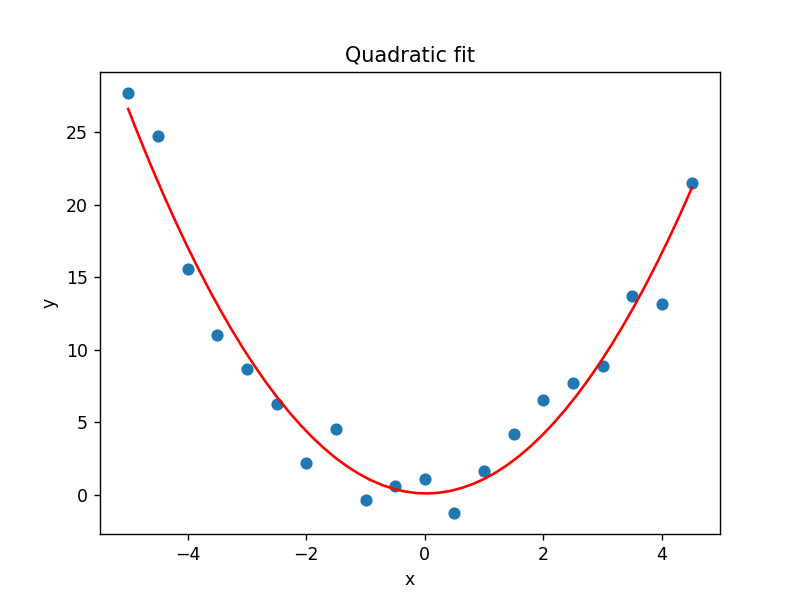

Text(0.5, 1.0, 'Quadratic fit')

In [40]:
plt.figure()
plt.scatter(X,y)
plt.plot(xs, ys_predicted, 'red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Quadratic fit")

# Test the function on n=5 data

[-327.56832807  -63.50551072  -31.32807324   13.3912805     1.95317921
    0.58645416] 0.9085520122690045


<IPython.core.display.Javascript object>


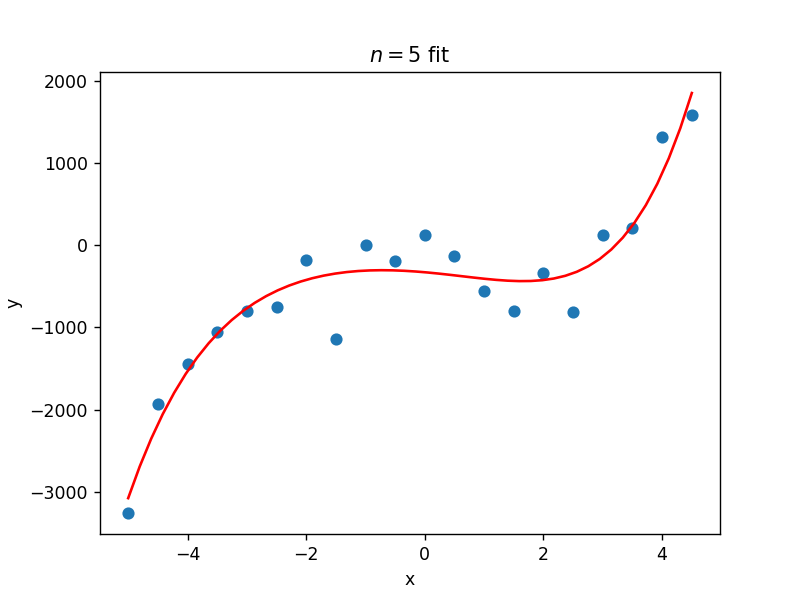

Text(0.5, 1.0, '$n=5$ fit')

In [45]:
n=5
X = np.arange(-5,5, 0.5)
y = X**n + np.random.normal(0, 500, len(X))

regtest = PolynomialLinearRegressionMyClass(n, X, y)
regtest.fit()
print(regtest.coef_, regtest.R2)

xs = np.linspace(np.min(X),np.max(X))
ys_predicted = regtest.predict(xs)

plt.figure()
plt.scatter(X,y)
plt.plot(xs, ys_predicted, 'red')
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"$n=5$ fit")